In [ ]:
#Visualization of TAD boundaries and boundary frequency in IVF embryos over the chr1:30.3–50.3 Mb region highlights local chromatin domain organization.
hicPlotTADs --tracks IVF_BF_vs_Boundary.ini -o IVF-chr1-50300000-70300000.png --region chr1:30300000-50300000 --dpi 300


In [19]:
import pandas as pd

# 读取数据
file_path = "IVF_4C_40k_TAD_obscure.txt"  # 替换为你的文件路径
data = pd.read_csv(file_path, sep="\t", header=None)

# 给列命名
data.columns = ["chr", "start", "end", "value1", "value2"]

# 按前三列分组，取 value2 的最大值，同时保留对应的 value1（可按规则选取）
result = (
    data.groupby(["chr", "start", "end"], as_index=False)
    .agg({"value1": "first", "value2": "max"})  # 保留第一个 value1 和最大 value2
)

# 保存结果到文件
output_path = "IVF_4C_40k_TAD_obscure_out.txt"  # 替换为你的输出文件路径
result.to_csv(output_path, sep="\t", index=False)

print("处理完成，结果已保存到文件:", output_path)


处理完成，结果已保存到文件: IVF_4C_40k_TAD_obscure_out.txt


0.7166014904252547 0.0


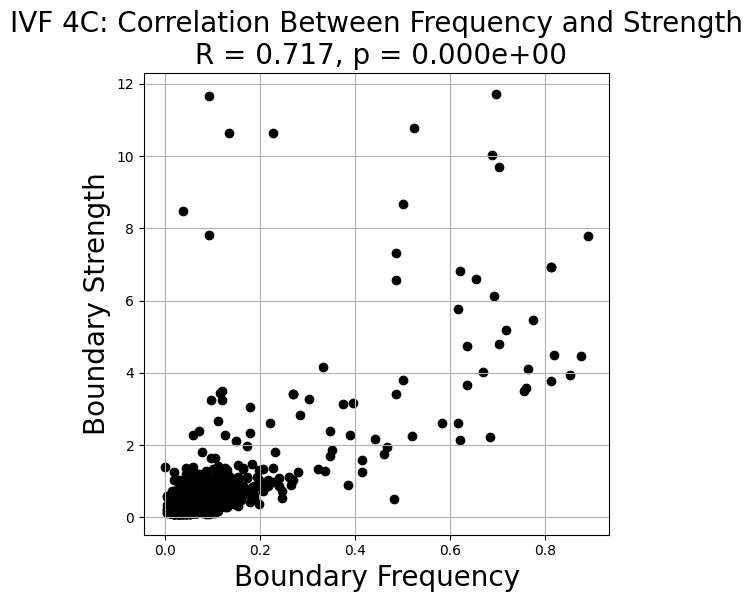

In [3]:
#40k TAD 模糊
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据文件
file_path = 'IVF_4C_40k_TAD_obscure_out.txt'
data = pd.read_csv(file_path, sep='\t')

# 提取 rna 和 hic 列数据
rna_scaled = data['value2']
hic_scaled = data['value1']
# 去除 strength 大于 15 的点

# 计算 Pearson 相关系数和 p 值
r_value, p_value = pearsonr(rna_scaled, hic_scaled)
print(r_value, p_value)
# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(rna_scaled, hic_scaled,color='black')
plt.title(f'IVF 4C: Correlation Between Frequency and Strength\n R = {r_value:.3f}, p = {p_value:.3e}',fontsize=20)
plt.xlabel('Boundary Frequency',fontsize=20)
plt.ylabel('Boundary Strength',fontsize=20)
plt.grid(True)
plt.savefig('IVF_Boundary_vs_Non-Boundary_corr.svg', dpi=300, bbox_inches='tight', transparent=True)

In [36]:
import pandas as pd

# 读取数据
file_path = "PA_4C_TAD_BF_40k_obscure.txt"  # 替换为你的文件路径
data = pd.read_csv(file_path, sep="\t", header=None)

# 给列命名
data.columns = ["chr", "start", "end", "value1", "value2"]

# 按前三列分组，取 value2 的最大值，同时保留对应的 value1（可按规则选取）
result = (
    data.groupby(["chr", "start", "end"], as_index=False)
    .agg({"value1": "first", "value2": "max"})  # 保留第一个 value1 和最大 value2
)

# 保存结果到文件
output_path = "PA_4C_TAD_BF_40k_obscure_out.txt"  # 替换为你的输出文件路径
result.to_csv(output_path, sep="\t", index=False)

print("处理完成，结果已保存到文件:", output_path)


处理完成，结果已保存到文件: PA_4C_TAD_BF_40k_obscure_out.txt


0.6123040436515572 0.0


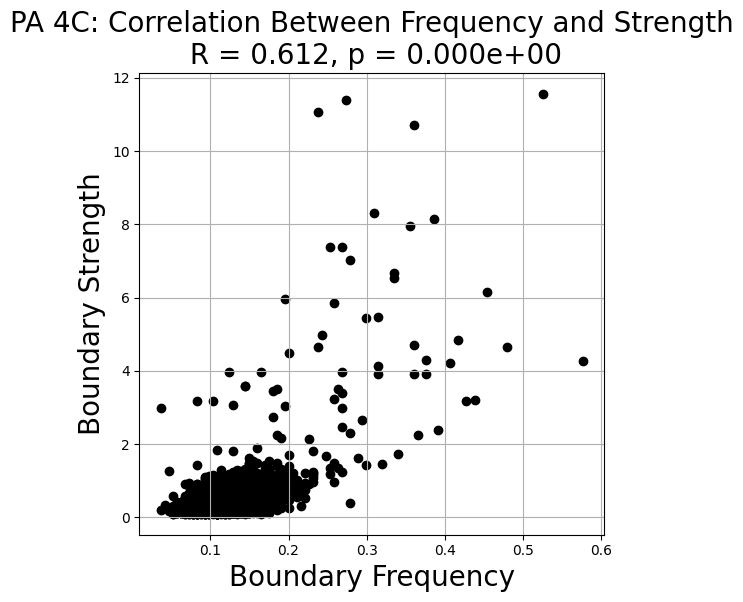

In [1]:
#40k TAD 模糊
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据文件
file_path = 'PA_4C_TAD_BF_40k_obscure_out.txt'
data = pd.read_csv(file_path, sep='\t')

# 提取 rna 和 hic 列数据
rna_scaled = data['value2']
hic_scaled = data['value1']
# 去除 strength 大于 15 的点

# 计算 Pearson 相关系数和 p 值
r_value, p_value = pearsonr(rna_scaled, hic_scaled)
print(r_value, p_value)
# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(rna_scaled, hic_scaled,color='black')
plt.title(f'PA 4C: Correlation Between Frequency and Strength\n R = {r_value:.3f}, p = {p_value:.3e}',fontsize=20)
plt.xlabel('Boundary Frequency',fontsize=20)
plt.ylabel('Boundary Strength',fontsize=20)
plt.grid(True)
plt.savefig('PA_Boundary_vs_Non-Boundary_corr.svg', dpi=300, bbox_inches='tight', transparent=True)

In [4]:
from collections import Counter

# 读取文件内容，生成列表
def read_numbers(file_path):
    with open(file_path, 'r') as f:
        return [float(line.strip()) for line in f]

# 写入结果到文件
def write_to_file(file_path, numbers):
    with open(file_path, 'w') as f:
        for num in numbers:
            f.write(f"{num}\n")

# 文件路径
file_a = 'ivf_40k_all.txt'
file_b = 'ivf_40k_boundary.txt'
file_difference = 'ivf_40k_non_boundary.txt'

# 读取两个文件生成列表
numbers_a = read_numbers(file_a)
numbers_b = read_numbers(file_b)

# 使用Counter计算出现次数
counter_a = Counter(numbers_a)
counter_b = Counter(numbers_b)

# 列表减法操作：从a中移除所有在b中出现的次数
for num in counter_b:
    if num in counter_a:
        counter_a[num] -= counter_b[num]
        if counter_a[num] <= 0:
            del counter_a[num]

# 展平结果，将剩余元素按出现次数展开
difference = []
for num, count in counter_a.items():
    difference.extend([num] * count)

# 写入结果到文件
write_to_file(file_difference, difference)

print("列表减法结果已写入文件：ivf_40k_non_boundary.txt")


列表减法结果已写入文件：ivf_40k_non_boundary.txt


Boundary Value Range: 0.0 to 0.889423077
Non-Boundary Value Range: 0.0 to 0.865384615
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary vs. Non-Boundary: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.600e+08


<Figure size 800x600 with 0 Axes>

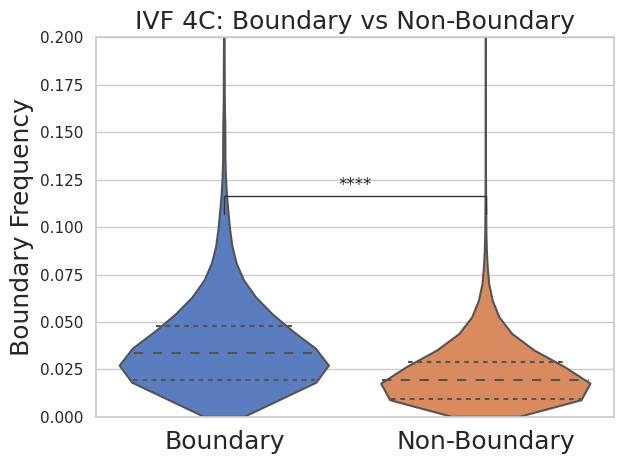

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取文件内容，生成列表
def read_numbers(file_path):
    with open(file_path, 'r') as f:
        return [float(line.strip()) for line in f]

# 文件路径
file_boundary = 'ivf_40k_boundary.txt'
file_non_boundary = 'ivf_40k_non_boundary.txt'

# 读取数据
boundary_data = read_numbers(file_boundary)
non_boundary_data = read_numbers(file_non_boundary)

# 打印数据范围
print(f"Boundary Value Range: {min(boundary_data)} to {max(boundary_data)}")
print(f"Non-Boundary Value Range: {min(non_boundary_data)} to {max(non_boundary_data)}")

# 准备绘图数据
data = pd.DataFrame({
    'Value': boundary_data + non_boundary_data,
    'Category': ['Boundary'] * len(boundary_data) + ['Non-Boundary'] * len(non_boundary_data)
})

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制小提琴图
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
sns.violinplot(data=data, x='Category', y='Value', palette="muted", ax=ax, inner="quart", cut=0, scale="width")

# 添加标题和标签
plt.title('IVF 4C: Boundary vs Non-Boundary', fontsize=18)
plt.xlabel('', fontsize=18)
plt.ylabel('Boundary Frequency', fontsize=18)
# 调整 x 轴刻度字体大小
plt.xticks(fontsize=18)

# 添加统计检验和注释
pairs = [("Boundary", "Non-Boundary")]
annotator = Annotator(ax, pairs, data=data, x='Category', y='Value')
annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.01, line_width=1, loc='inside')
annotator.apply_and_annotate()

# 限制 y 轴范围
plt.ylim(0, 0.2)  # 根据实际数据调整

# 显示图像
plt.tight_layout()
plt.savefig('IVF_Boundary_vs_Non-Boundary.svg', dpi=300, bbox_inches='tight', transparent=True)

In [6]:
from collections import Counter

# 读取文件内容，生成列表
def read_numbers(file_path):
    with open(file_path, 'r') as f:
        return [float(line.strip()) for line in f]

# 写入结果到文件
def write_to_file(file_path, numbers):
    with open(file_path, 'w') as f:
        for num in numbers:
            f.write(f"{num}\n")

# 文件路径
file_a = 'pa_40k_all.txt'
file_b = 'pa_40k_boundary.txt'
file_difference = 'pa_40k_non_boundary.txt'

# 读取两个文件生成列表
numbers_a = read_numbers(file_a)
numbers_b = read_numbers(file_b)

# 使用Counter计算出现次数
counter_a = Counter(numbers_a)
counter_b = Counter(numbers_b)

# 列表减法操作：从a中移除所有在b中出现的次数
for num in counter_b:
    if num in counter_a:
        counter_a[num] -= counter_b[num]
        if counter_a[num] <= 0:
            del counter_a[num]

# 展平结果，将剩余元素按出现次数展开
difference = []
for num, count in counter_a.items():
    difference.extend([num] * count)

# 写入结果到文件
write_to_file(file_difference, difference)

print("列表减法结果已写入文件：pa_40k_non_boundary.txt")


列表减法结果已写入文件：pa_40k_non_boundary.txt


Boundary Value Range: 0.0 to 0.577319588
Non-Boundary Value Range: 0.0 to 0.798969072
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary vs. Non-Boundary: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.629e+08


<Figure size 800x600 with 0 Axes>

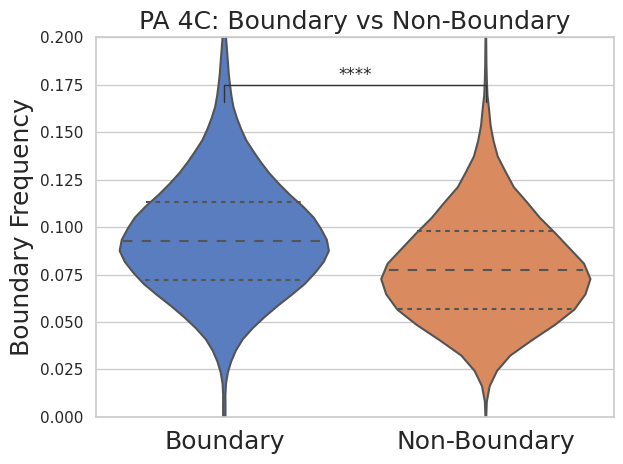

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取文件内容，生成列表
def read_numbers(file_path):
    with open(file_path, 'r') as f:
        return [float(line.strip()) for line in f]

# 文件路径
file_boundary = 'pa_40k_boundary.txt'
file_non_boundary = 'pa_40k_non_boundary.txt'

# 读取数据
boundary_data = read_numbers(file_boundary)
non_boundary_data = read_numbers(file_non_boundary)

# 打印数据范围
print(f"Boundary Value Range: {min(boundary_data)} to {max(boundary_data)}")
print(f"Non-Boundary Value Range: {min(non_boundary_data)} to {max(non_boundary_data)}")

# 准备绘图数据
data = pd.DataFrame({
    'Value': boundary_data + non_boundary_data,
    'Category': ['Boundary'] * len(boundary_data) + ['Non-Boundary'] * len(non_boundary_data)
})

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制小提琴图
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
sns.violinplot(data=data, x='Category', y='Value', palette="muted", ax=ax, inner="quart", cut=0, scale="width")

# 添加标题和标签
plt.title('PA 4C: Boundary vs Non-Boundary', fontsize=18)
plt.xlabel('', fontsize=18)
plt.ylabel('Boundary Frequency', fontsize=18)
# 调整 x 轴刻度字体大小
plt.xticks(fontsize=18)

# 添加统计检验和注释
pairs = [("Boundary", "Non-Boundary")]
annotator = Annotator(ax, pairs, data=data, x='Category', y='Value')
annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.01, line_width=1, loc='inside')
annotator.apply_and_annotate()

# 限制 y 轴范围
plt.ylim(0, 0.2)  # 根据实际数据调整

# 显示图像
plt.tight_layout()
plt.savefig('PA_Boundary_vs_Non-Boundary.svg', dpi=300, bbox_inches='tight', transparent=True)